# Homework 3 Graded Exercise:
## Chapter5-3.ipynb (this file is provided only after grading) 
The data is related with direct marketing campaigns of  a Portuguese banking institution. The 
marketing campaigns were based on phone calls. Often, more than one contact to the same client was 
required, in order to access if  the product (bank term deposit) would be (or not) subscribed. Data set is 
public – acknowledgement: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct 
Marketing: An Application of  the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of  
the  European  Simulation  and  Modelling  Conference  -  ESM'2011,  pp.  117-121,  Guimarães,  Portugal, 
October, 2011. EUROSIS.\
Download  from  ‘banking3.csv’.  This  is  a  simplified  version  of   the  original  data  set.  There  are  18 features  and  one  label  variable y.  y  =  1  denotes  success  in  getting  client  to  put  in  a  term  deposit.  y=0 denotes failure to do so.\
The  features  are  self-explanatory  as  in  Homework  2.  Note  that  Euribor3m  is  the  3-month  Euribor 
interest rate prevailing in the particular campaign for the client when client’s response was y=1 or y=0.

Use Random Forest method to predict if  a client would subscribe to a bank term deposit. Use the 
following specifications to construct training and test data sets. Assume optimal hyperparameters have 
been determined in the following specifications.

`from sklearn.model_selection import train_test_split`\
`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)`


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
%matplotlib inline
from random import sample
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [86]:
df = pd.read_csv("./QF634-G1-Applied Quantitative Research Methods - 11202024 - 802 PM/banking3.csv",index_col=0)

In [87]:
# Normalization
X = df.drop(columns=['y'])
y = df['y']


scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X,columns=df.drop(columns=['y']).columns)

X.shape, y.shape

((41188, 18), (41188,))

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28831, 18), (28831,), (12357, 18), (12357,))


Use the following specifications in the RandomForestClassifier in sklearn.

`from sklearn.ensemble import RandomForestClassifier`\
`  RF_model = RandomForestClassifier(n_estimators=1000, random_state=1, max_features=None, max_depth=None)`

Record the % of  cases of  y=1. 

In [89]:
y.mean()

0.11265417111780131

In [91]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=1000, random_state=1, max_features=None, max_depth=None)
### default n_estimators/trees = 100; default criterion = 'gini' 
### max_features default case is "sqrt"; unlike DecisionTree Classifier where default case = "none"
### If max_depth=None, then nodes are expanded until all leaves are pure or until all leaves contain less than 
###   min_samples_split samples -- usu 2
### bootsrapping - bagging, default=true
### oob_scorebool, default=False -- Whether to use out-of-bag samples to estimate the generalization score. 
###    Only available if bootstrap=True.
RF_model.fit(X_train,y_train)

y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print(f"RF Accuracy: {Accuracy_RF:.5f}")

RF Accuracy: 0.89682


Find the confusion matrix, 

In [64]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)

# Get the unique class labels
class_labels = np.unique(y_test)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Print the DataFrame with labeled rows and columns
print(cm_df)

       0    1
0  10683  298
1    977  399


confusion matrix
|                | Predicted: 0 | Predicted: 1 |
|----------------|--------------|--------------|
| **True: 0**    | 10683        | 298          |
| **True: 1**    | 977          | 399          |

Also,
|                | Predicted: 0 | Predicted: 1 |
|----------------|--------------|--------------|
| **True: 0**    | TP_0         | FN_0         |
| **True: 1**    | FP_0         | TN_0         |


classification report 

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))
### classification_report(y_test, y_pred, digits=8) # will give more decimal places

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10981
           1       0.57      0.29      0.38      1376

    accuracy                           0.90     12357
   macro avg       0.74      0.63      0.66     12357
weighted avg       0.88      0.90      0.88     12357



In [84]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred_RF, pos_label=1)

print("F1 Score:", f1)

F1 Score: 0.3849493487698987


and area under ROC.


In [66]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_RF = RF_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_RF)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_RF = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_RF

0.771279818947315

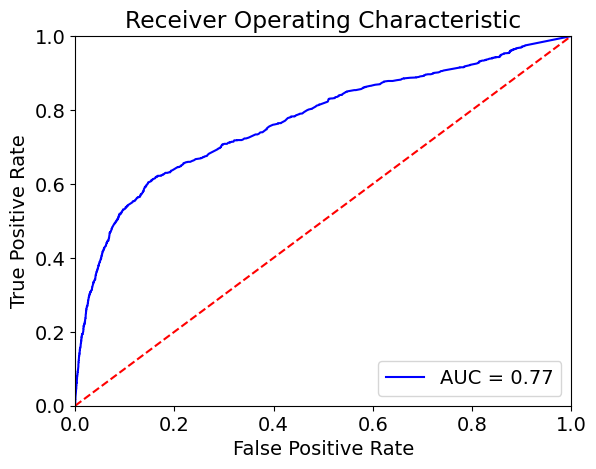

In [67]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

What are the importance features. 

In [68]:
import time
import numpy as np

start_time = time.time()
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
### importances.shape is (25,)

Elapsed time to compute the importances: 0.060 seconds


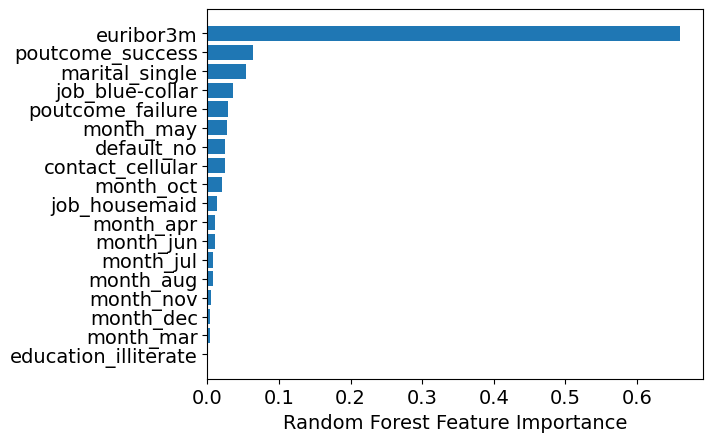

<Figure size 1600x1200 with 0 Axes>

In [69]:
### another representation
sorted_idx = RF_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],RF_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.figure(figsize=(20, 15), dpi=80);

In [80]:
df.sort_values(by='euribor3m')[['euribor3m','y']]

,euribor3m,y
14114,0.634,1
34063,0.634,1
18853,0.634,1
16722,0.634,0
4459,0.634,1
...,...,...
22652,5.045,0
35180,5.045,0
4957,5.045,1
9011,5.045,1


In [79]:
df.sort_values(by='euribor3m')[['euribor3m','y']].head(5000)['y'].mean()

0.4058

In [78]:
df.sort_values(by='euribor3m')[['euribor3m','y']].tail(5000)['y'].mean()

0.0564

There is a much higher proportion of y = 1 when euribor3m is lower. Therefore higher euribor3m results in decrease in chances of subscription. As clients hopes to be rewarded with higher returns elsewhere

How do you compare with logistic regression?

In [70]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=1, 
                        multi_class='multinomial',
                        solver='newton-cg')
LR = LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.9007849801731812


In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_RF)

# Get the unique class labels
class_labels = np.unique(y_test)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Print the DataFrame with labeled rows and columns
print(cm_df)

       0    1
0  10683  298
1    977  399


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.71      0.18      0.29      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [73]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_LR = LR.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_LR)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_LR = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_LR

0.7907754713215003